In [ ]:
#import
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the original image
im_path = "./bill.jpg"
f = cv2.imread(im_path)

In [ ]:
# Convert the original image to grayscale
gray_image = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)

In [ ]:
# Generate Canny edge detection image
canny_e = cv2.Canny(gray_image, 100, 150)

In [ ]:
# Apply Marr-Hildreth edge detection using LoG filter
laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
laplacian_abs = np.absolute(laplacian)
marr_hildreth_e = cv2.convertScaleAbs(laplacian_abs)

In [ ]:
# Define the random constant c
c = 1

In [ ]:
# Perform the element-wise addition for Canny
g_canny = cv2.add(f, cv2.merge([canny_e] * 3) * c)
g_canny = np.clip(g_canny, 0, 255).astype(np.uint8)

In [ ]:
# Perform the element-wise addition for Marr-Hildreth
g_marr_hildreth = cv2.add(f, cv2.merge([marr_hildreth_e] * 3) * c)
g_marr_hildreth = np.clip(g_marr_hildreth, 0, 255).astype(np.uint8)
# Display the images
plt.figure(figsize=(12, 9))

In [ ]:
# Display the original image
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(f, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

In [ ]:
# Display the generated Canny edge detection image
plt.subplot(2, 3, 2)
plt.imshow(canny_e, cmap='gray')
plt.title('Generated Canny Edge Detection')
plt.axis('off')

In [ ]:
# Display the generated output image for Canny
plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(g_canny, cv2.COLOR_BGR2RGB))
plt.title('Output Image (Canny)')
plt.axis('off')

In [ ]:
# Display the generated Marr-Hildreth edge detection image
plt.subplot(2, 3, 4)
plt.imshow(marr_hildreth_e, cmap='gray')
plt.title('Generated Marr-Hildreth Edge Detection')
plt.axis('off')

In [ ]:
# Display the generated output image for Marr-Hildreth
plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(g_marr_hildreth, cv2.COLOR_BGR2RGB))
plt.title('Output Image (Marr-Hildreth)')
plt.axis('off')

In [ ]:
# Adjust spacing between images
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.tight_layout()
plt.show()

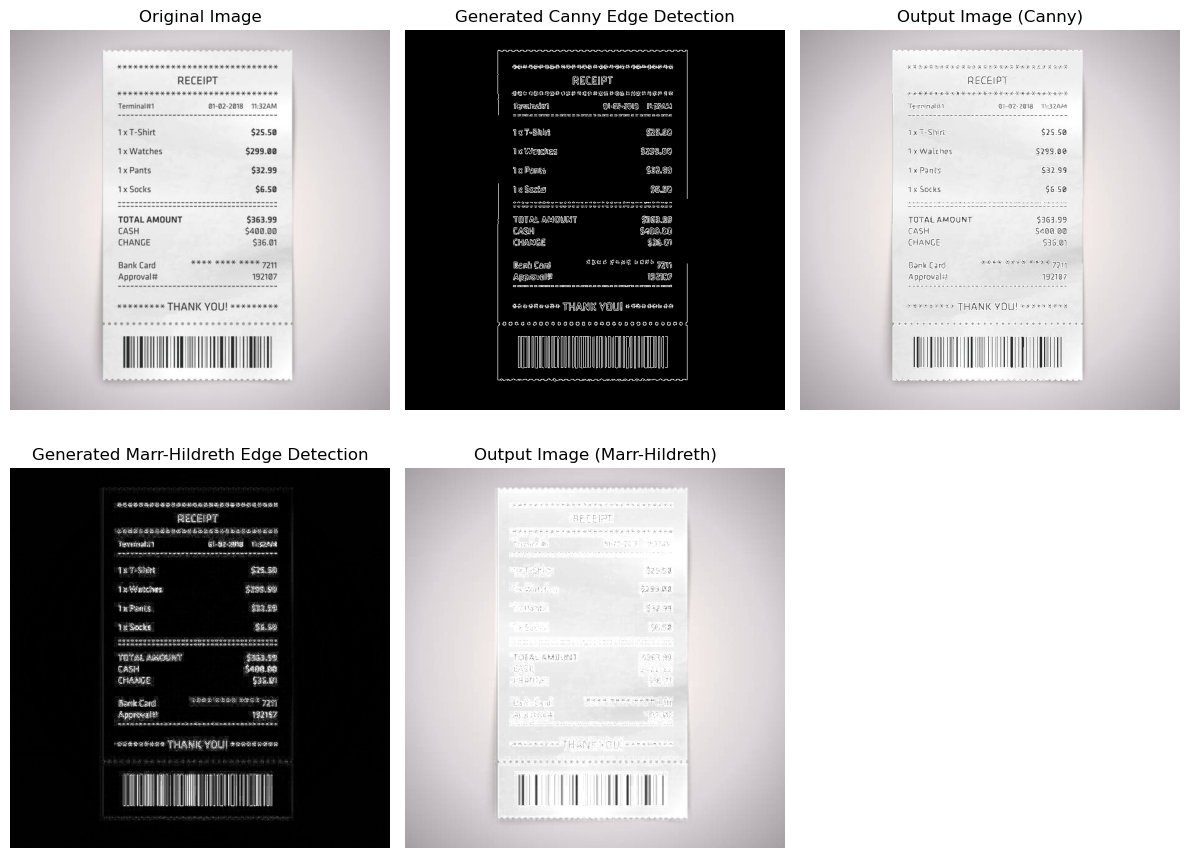

In [ ]:
## import
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [ ]:
im_path = "./bill4.jpeg"

# read image from path
img = cv2.imread(im_path)

# Convert BGR to RGB for proper display with Matplotlib
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# print the shape of the image (height, width, channels)
print(img.shape)

In [ ]:
# img resize
img = cv2.resize(img, (1500, 800))
print(img.shape)

plt.imshow(img_rgb)  # Display the RGB image
plt.show()

(1066, 800, 3)
(800, 1500, 3)


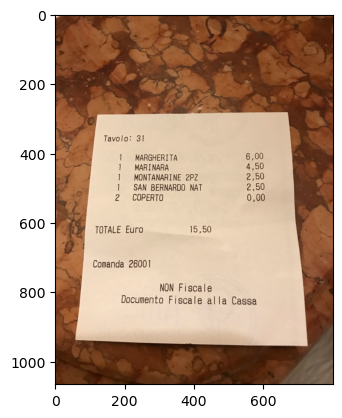

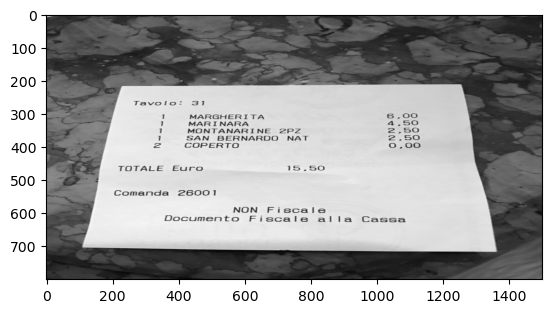

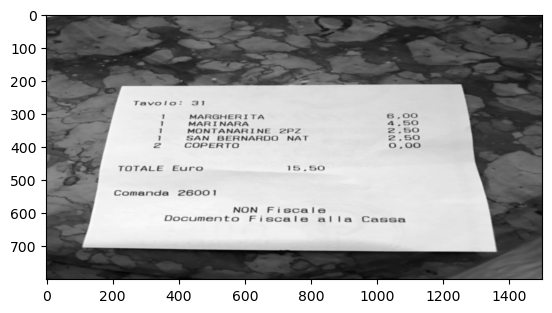

(800, 1500)


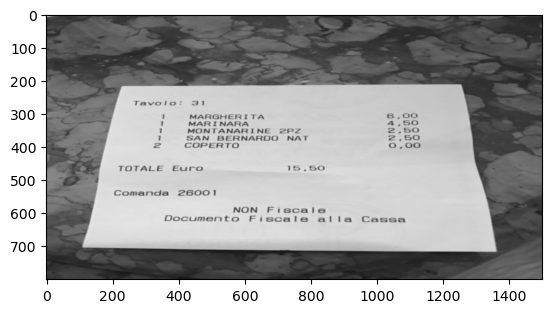

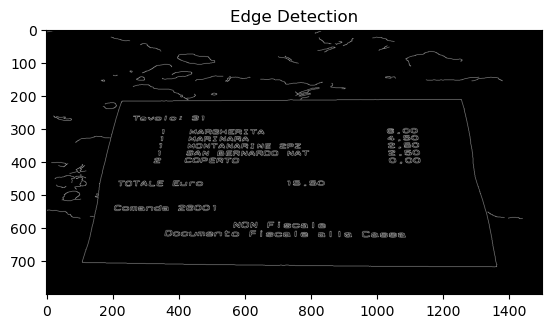

470
(4, 1, 2)
[[196  24]
 [231  34]
 [253  35]
 [231  34]]
Reordered Contours:
[[196.  24.]
 [253.  35.]
 [253.  35.]
 [196.  24.]]


In [4]:






# Preprocess image: remove noise, edge detection, contour extraction

## Image Blurring
orig = img.copy()
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blurred, cmap='gray')
plt.show()
print(blurred.shape)

regen = cv2.cvtColor(blurred, cv2.COLOR_GRAY2BGR)
plt.imshow(cv2.cvtColor(regen, cv2.COLOR_BGR2RGB))  # Convert to RGB for display
plt.show()

## Edge Detection
edge = cv2.Canny(blurred, 50, 150)
plt.imshow(edge, cmap='gray')
plt.title("Edge Detection")
plt.show()

## Contours Extraction
contours, _ = cv2.findContours(edge, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
print(len(contours))

contours = sorted(contours, reverse=True, key=cv2.contourArea)

# Select the best contour (with 4 points)
target = None
for c in contours:
    p = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.01*p, True)
    if len(approx) == 4:
        target = approx
        break

if target is not None:
    print(target.shape)

## Reorder contours

def reorder(h):
    h = h.reshape((4, 2))
    print(h)

    hnew = np.zeros((4, 2), dtype=np.float32)

    add = h.sum(axis=1)
    hnew[0] = h[np.argmin(add)]  # top-left point
    hnew[2] = h[np.argmax(add)]  # bottom-right point

    diff = np.diff(h, axis=1)
    hnew[1] = h[np.argmin(diff)]  # top-right point
    hnew[3] = h[np.argmax(diff)]  # bottom-left point

    return hnew

if target is not None:
    reorder_result = reorder(target)
    print("Reordered Contours:")
    print(reorder_result)
else:
    print("No contour with 4 points was found.")

## Project to a fixed screen

if target is not None:
    input_representation = reorder_result
    output_map = np.float32([[0, 0], [800, 0], [800, 800], [0, 800]])

    M = cv2.getPerspectiveTransform(input_representation, output_map)
    ans = cv2.warpPerspective(orig, M, (800, 800))
